In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = f"{path}/{expression}"
        print(dir_)
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(TRAIN_DIR, 'train')
test_count = count_exp(TEST_DIR, 'test')
print(train_count)
print(test_count)

images/train/angry
images/train/disgust
images/train/fear
images/train/happy
images/train/neutral
images/train/sad
images/train/surprise
images/test/angry
images/test/disgust
images/test/fear
images/test/happy
images/test/neutral
images/test/sad
images/test/surprise
       angry  disgust  fear  happy  neutral   sad  surprise
train   3993      436  4103   7164     4982  4938      3205
      angry  disgust  fear  happy  neutral   sad  surprise
test    960      111  1018   1825     1216  1139       797


<Axes: >

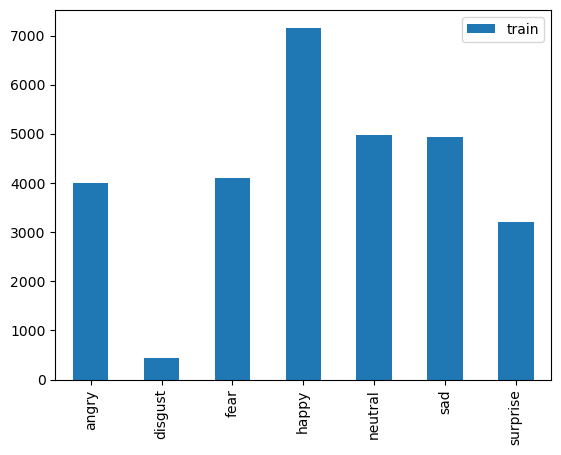

In [3]:
# plot count of data train
train_count.transpose().plot(kind='bar')

<Axes: >

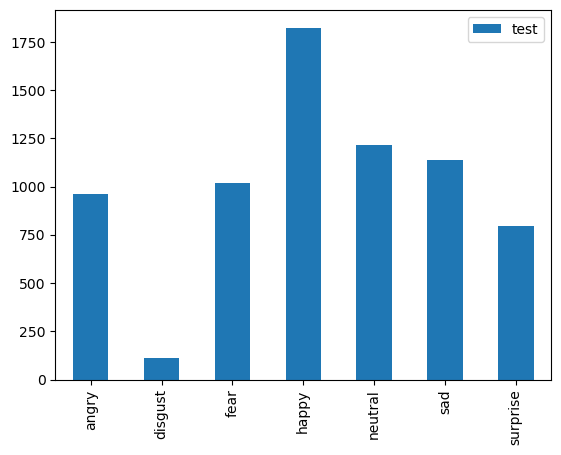

In [4]:
# plot count of data test
test_count.transpose().plot(kind='bar')

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


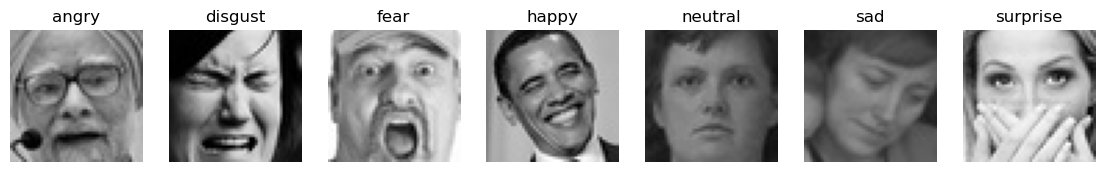

In [6]:
# show some random images
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(TRAIN_DIR):
  pa = os.listdir(f"{TRAIN_DIR}/{expression}")[1]
  path_img = (f"{TRAIN_DIR}/{expression}/{pa}")
  img = load_img(path_img)
  plt.subplot(1,7,i)
  plt.imshow(img)
  plt.title(expression)
  plt.axis('off')
  i += 1
plt.show()

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [11]:
from tqdm.notebook import tqdm

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [13]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\void4zzZ\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In Convolutional Neural Networks (CNNs), label encoding is used in training data to represent the target or output values associated with the input data. Label encoding is necessary because machine learning models, including CNNs, require a numeric representation of the target variables for training and making predictions. Here's why label encoding is important in CNNs:

    Numerical Representation: CNNs are mathematical models that perform computations on numerical data. To train a CNN, you need to represent the target classes (e.g., object categories in image classification) as numbers. Label encoding converts class labels into numerical values, typically integers. For example, if you have classes like "cat," "dog," and "bird," you might encode them as 0, 1, and 2, respectively.

    Loss Calculation: During training, CNNs use a loss function to measure the difference between their predictions and the actual labels. This loss function requires numeric values to compute the error. By using label encoding, you can calculate the loss for each prediction and adjust the model's parameters (weights) to minimize this loss.

    Categorical Cross-Entropy: In many classification problems, especially multi-class classification, the categorical cross-entropy loss is commonly used. This loss function expects one-hot encoded labels or integer labels to calculate the loss. Label encoding provides the necessary integer labels for this loss function.

    Classification Output: The final layer of a CNN is typically a softmax layer, which assigns probabilities to each class. This layer produces a probability distribution over the classes, and the class with the highest probability is considered the model's prediction. Label encoding ensures that the model can map its output to a specific class label.

    Evaluation and Interpretation: After training, it's essential to interpret the model's predictions and evaluate its performance. Label encoding allows you to map the model's numerical predictions back to their corresponding class labels for easier interpretation and evaluation.

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 20, validation_data = (x_test,y_test)) 


Epoch 1/20
226/226 [==============================] - 1012s 4s/step - loss: 1.8232 - accuracy: 0.2421 - val_loss: 1.8109 - val_accuracy: 0.2583
Epoch 2/20
226/226 [==============================] - 1031s 5s/step - loss: 1.7954 - accuracy: 0.2550 - val_loss: 1.7240 - val_accuracy: 0.2918
Epoch 3/20
226/226 [==============================] - 1033s 5s/step - loss: 1.7075 - accuracy: 0.3059 - val_loss: 1.6003 - val_accuracy: 0.3879
Epoch 4/20
226/226 [==============================] - 1058s 5s/step - loss: 1.5980 - accuracy: 0.3717 - val_loss: 1.4634 - val_accuracy: 0.4451
Epoch 5/20
226/226 [==============================] - 1026s 5s/step - loss: 1.5071 - accuracy: 0.4116 - val_loss: 1.3783 - val_accuracy: 0.4708
Epoch 6/20
226/226 [==============================] - 1029s 5s/step - loss: 1.4511 - accuracy: 0.4391 - val_loss: 1.3470 - val_accuracy: 0.4827
Epoch 7/20
226/226 [==============================] - 1030s 5s/step - loss: 1.4067 - accuracy: 0.4573 - val_loss: 1.2901 - val_accuracy:

In [35]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [36]:
from keras.models import model_from_json

In [37]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [38]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [39]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [40]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 140ms/step
model prediction is  sad


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 37ms/step
model prediction is  sad


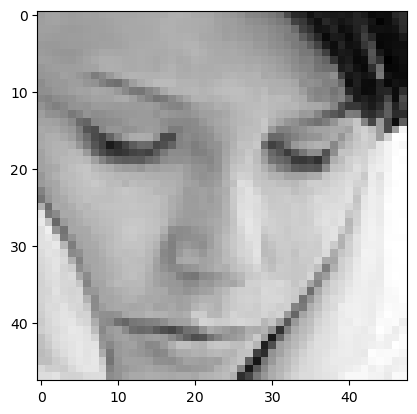

In [42]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 29ms/step
model prediction is  sad


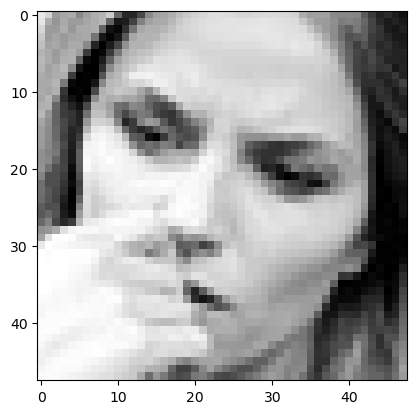

In [43]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 36ms/step
model prediction is  disgust


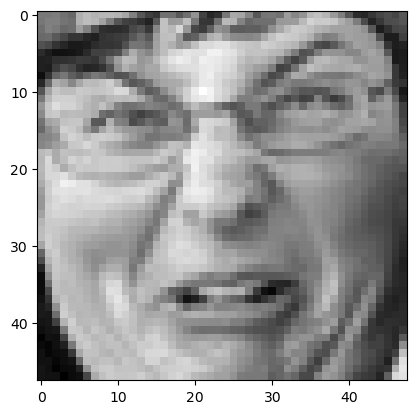

In [44]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 28ms/step
model prediction is  happy


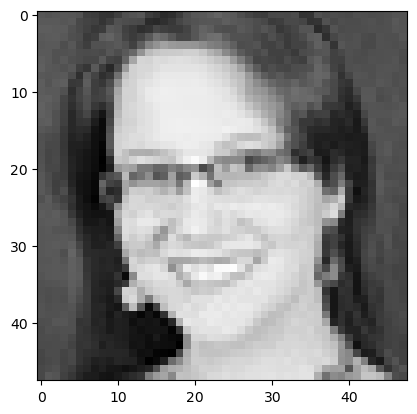

In [45]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 41ms/step


model prediction is  surprise


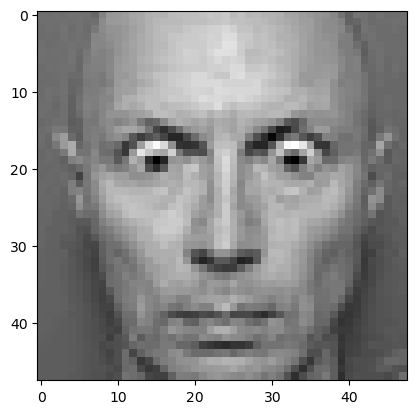

In [46]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')